# MNIST Dataset digit recognition

Dataset: https://en.wikipedia.org/wiki/MNIST_database

Based off: https://medium.com/geekculture/deep-learning-a-to-z-part-2-mnist-the-hello-world-of-neural-networks-2429c4367086

In [1]:
# Install packages
%conda install pandas -y -q
%conda install matplotlib -y -q
%conda install tensorflow -y -q

Channels:
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Channels:
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Channels:
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

2025-06-04 15:02:00.433400: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


tensorflow version: 2.15.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf

In [4]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Scale the values to range [0, 1]
X_train_full = X_train_full/255.
X_test = X_test/255.

# Create the validation data from training data.
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

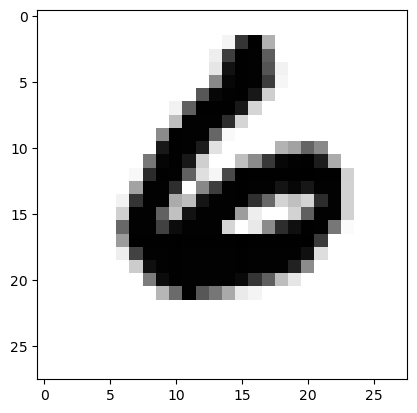

In [5]:
# Show a random image
plt.imshow(X_train[np.random.randint(0, len(X_train))], cmap='binary')

In [6]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
]
model = tf.keras.models.Sequential(LAYERS)

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="SGD",
             metrics=["accuracy"])

In [8]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)
history = model.fit(X_train, y_train, epochs=EPOCHS,
                   validation_data=VALIDATION_SET)

Epoch 1/30


2025-06-04 15:02:03.984329: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 7s 4ms/step - loss: 0.6187 - accuracy: 0.8409 - val_loss: 0.3109 - val_accuracy: 0.9170
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2894 - accuracy: 0.9185 - val_loss: 0.2398 - val_accuracy: 0.9346
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2362 - accuracy: 0.9330 - val_loss: 0.2096 - val_accuracy: 0.9392
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2027 - accuracy: 0.9428 - val_loss: 0.1787 - val_accuracy: 0.9518
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1774 - accuracy: 0.9497 - val_loss: 0.1608 - val_accuracy: 0.9576
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1575 - accuracy: 0.9552 - val_loss: 0.1454 - val_accuracy: 0.9612
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1414 - accuracy: 0.9603 - val_loss: 0.1350 - val_accuracy: 0.9618
Epo

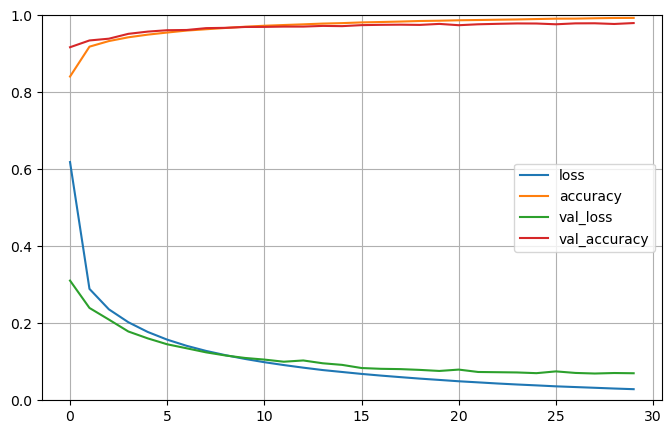

In [9]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0757 - accuracy: 0.9765
Test Loss: 0.0757
Test Accuracy: 97.65%


1/1 [==============================] - 0s 76ms/step


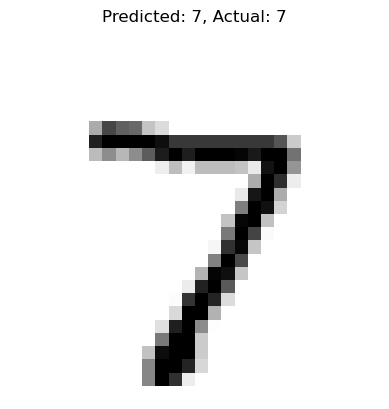

------------------------------------------------------------


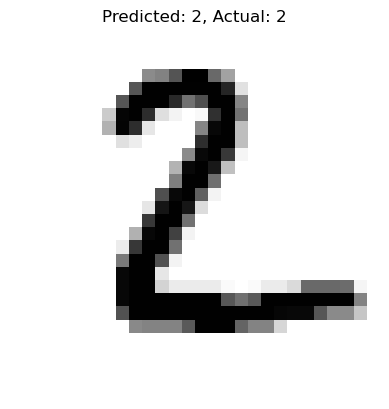

------------------------------------------------------------


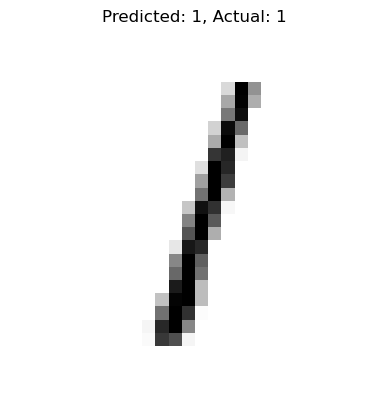

------------------------------------------------------------


In [11]:
X_new = X_test[:3]
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_test_new = y_test[:3]
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)